## 逻辑回归 参数测试

**penalty正则化参数 L1&L2的区别**  
**L1:** 将特征参数压缩为0  
**L2:** 特征参数压缩接近0

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score#精确性分数

In [3]:
data = load_breast_cancer()#乳腺癌数据集
X = data.data
y = data.target

In [4]:
X.data.shape#(569, 30)
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [6]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)
lrl1.coef_
 
(lrl1.coef_ != 0).sum(axis=1) #array([10])    30个特征中有10个特征的系数不为0

array([10])

In [7]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61033500e+00,  1.00548857e-01,  5.61895939e-02,
        -4.95312736e-03, -9.81194570e-02, -2.98489959e-01,
        -4.60176849e-01, -2.29087188e-01, -1.40887076e-01,
        -1.86954651e-02,  1.17059350e-02,  8.61507076e-01,
         1.13288921e-01, -9.35476386e-02, -1.05206757e-02,
        -1.68487741e-02, -5.18446154e-02, -2.77052837e-02,
        -2.80293111e-02,  1.26294985e-03,  1.22071165e+00,
        -2.98700744e-01, -1.72966678e-01, -2.18036710e-02,
        -1.80934844e-01, -8.59123331e-01, -1.15896085e+00,
        -4.39976342e-01, -4.33464811e-01, -8.46387382e-02]])

## L1L2正则化学习曲线

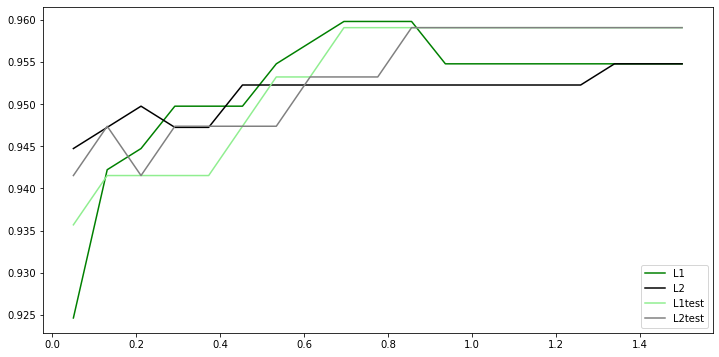

In [10]:
l1 = []
l2 = []
l1test = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=666)
 
for i in np.linspace(0.05,1.5,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
 
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    
 
plt.figure(figsize=(12,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1.5,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.385982
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240498


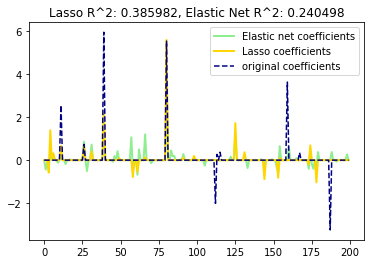

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#def main():
# 产生一些稀疏数据
np.random.seed(42)
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features) # randn(...)产生的是正态分布的数据
coef = 3 * np.random.randn(n_features)     # 每个特征对应一个系数
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # 稀疏化系数--随机的把系数向量1x200的其中10个值变为0
y = np.dot(X, coef)  # 线性运算 -- y = X.*w
# 添加噪声：零均值，标准差为 0.01 的高斯噪声
y += 0.01 * np.random.normal(size=n_samples)

# 把数据划分成训练集和测试集
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# 训练 Lasso 模型
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# 训练 ElasticNet 模型
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

In [1]:
import spark

ModuleNotFoundError: No module named 'spark'

In [4]:
import datetime
import sys
import pyspark
from pyspark.sql.functions import when,expr,col,isnull,substring,desc,max,min,sum,length,count,lit,format_string
import pyspark.sql.functions as fn
import re
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
import os
# os.environ['PYSPARK_PYTHON']='D:\Anaconda3\envs\python_learning\python.exe'
spark=SparkSession.builder.getOrCreate()

In [5]:
test1=spark.read.csv('/Users/gengbh/code/vscode/Data-Analysis-Notes/caicai-sklearn/chapter5/model_test.csv')

In [6]:
test1.head()

Row(_c0=None, _c1='SeriousDlqin2yrs', _c2='RevolvingUtilizationOfUnsecuredLines', _c3='age', _c4='NumberOfTime30-59DaysPastDueNotWorse', _c5='DebtRatio', _c6='MonthlyIncome', _c7='NumberOfOpenCreditLinesAndLoans', _c8='NumberOfTimes90DaysLate', _c9='NumberRealEstateLoansOrLines', _c10='NumberOfTime60-89DaysPastDueNotWorse', _c11='NumberOfDependents')